# Attempting to predict the genre of a song given 14 other features

## By Team TBD


In [1]:
# Rohan Patel
# Nasar Issa
# EJ Oyazgan
# Steven Wong
#
#
# Dataset downloaded from: 
# https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db#SpotifyFeatures.csv
# Explanations for all of the features: 
# https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/


In [2]:
# import any libraries we will use for this classification problem
%matplotlib inline
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn import metrics 
from scipy.spatial.distance import cdist 
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn import tree

C:\Users\thesm\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
# load the raw dataset
raw_data = pd.read_csv('Data/SpotifyFeatures.csv')
raw_data.head()


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
# Clean the data of any weird or unneccessary categories (done in "Cleaned Data Notebook")
data = pd.read_csv('Data/CleanSpotifyData.csv')
data.head()


,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,0,0.611,0.389,99373,0.910,0.000,0,0.3460,-1.828,0,0.0525,166.969,0,0.814
1,Movie,1,0.246,0.590,137373,0.737,0.000,1,0.1510,-5.559,1,0.0868,174.003,0,0.816
2,Movie,3,0.952,0.663,170267,0.131,0.000,2,0.1030,-13.879,1,0.0362,99.488,1,0.368
3,Movie,0,0.703,0.240,152427,0.326,0.000,0,0.0985,-12.178,0,0.0395,171.758,0,0.227
4,Movie,4,0.950,0.331,82625,0.225,0.123,3,0.2020,-21.150,0,0.0456,140.576,0,0.390


In [5]:
# Run the K-Means Algorithm on the normalized training Data
# From the data in the "finding optimal clusters notebook" it has been determined 8 clusters
# is a good amount of clusters

# Normalize the Data for training
columns = list(data.columns)
#remove the genre label from the data we will run k-means on
columns.remove('genre')
normalized_data = stats.zscore(data[columns])

kmeans = KMeans(n_clusters=8).fit(normalized_data)
labels = kmeans.labels_

data['cluster'] = labels
columns.extend(['cluster'])

In [8]:
#From the information gained in "finding optimal clusters" we have chosen
# Rap & Classical for 2 similiar genres. Jazz & Electronic for distinct genres
# Now we will run mutliple binary classifiers to see if there are any relationships between the data


## Binary Classifiers Comparing Rap and Classic music

In [9]:
#first we need to only get different genre items
different = data.loc[(data['genre'] == "Rap") | (data['genre'] == "Classical") ]
#then drop the clusters we appended
different.drop('cluster', axis = 1, inplace=True)
#convert Rap to 0 and Genre to 1
numberValues = [0,1]
different.replace(to_replace=['Rap', 'Classical'], value=numberValues, inplace=True)
different['genre'] = different['genre'].astype(int)

C:\Users\thesm\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\thesm\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\thesm\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
# prep 3 differnt shuffles for 3-fold crossvalidation to find optimal hyperparameters

#convert dataframe into an array
X_and_Y = different.values

#normalize the data values, but not the labels
X_and_Y[:, 1:] = preprocessing.normalize(X_and_Y[:, 1:])


#shuffle the data 3 times and put it into a list
np.random.shuffle(X_and_Y)
X_and_Y_1 = X_and_Y
np.random.shuffle(X_and_Y)
X_and_Y_2 = X_and_Y
np.random.shuffle(X_and_Y)
X_and_Y_3 = X_and_Y

#combine all shuffled sets into an list
List = [X_and_Y_1,X_and_Y_2,X_and_Y_3]

##### Decison Tree (rap & classic)

In [11]:
# now lets try decision Tree
## Partition Data into a split of 80% training_val 20% test and run 3 trials
## Report the avg train, val, and test accuracies

D_list = [1,2,4,8,16,32]
param = dict( max_depth = D_list)
train_acc_list = []
val_acc_list = []
test_acc_list = []
for trial in range(3):
    
    #get one of the shuffled sets of X_and_Y
    Shuffle = List[trial]
    
    #split data into X and Y
    X = Shuffle[:, 1:]         
    Y = Shuffle[:, 0] 
    
    
    #split data into train/test sets
    X_train_val = X[:int(0.8*len(X))] # Get features from train + val set.
    X_test      = X[int(0.8*len(X)):] # Get features from test set.     
    Y_train_val = Y[:int(0.8*len(Y))] # Get labels from train + val set.
    Y_test      = Y[int(0.8*len(Y)):] # Get labels from test set.
    
    clf = tree.DecisionTreeClassifier(criterion = 'entropy')

    grid = GridSearchCV(clf, param)
    grid.fit(X_train_val,Y_train_val)
    
    train_acc_list.append(grid.cv_results_['mean_train_score'].max())
    val_acc_list.append(grid.cv_results_['mean_test_score'].max())
    
    best = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = grid.best_params_['max_depth'])
    best.fit(X_train_val, Y_train_val)
    test_acc = np.sum(best.predict(X_test) == Y_test)*1.0/X_test.shape[0]
    
    test_acc_list.append(test_acc)
    
train_acc1 = sum(train_acc_list) / 3
val_acc1 = sum(val_acc_list) / 3
test_acc1 = sum(test_acc_list) / 3

print(train_acc1)
print(val_acc1)
print(test_acc1)
print(grid.best_params_['max_depth'])

C:\Users\thesm\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\thesm\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


1.0
0.9831643002028398
0.9808004326663061
8


C:\Users\thesm\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


#### Random Forest (rap & classic)

In [12]:

## Partition Data into a split of 80% training_val 20% test and run 3 trials
## Report the avg train, val, and test accuracies

N_list = [10, 16, 32, 64, 128, 256]
D_list = [1,2,4,8,16]
param = dict(n_estimators = N_list, max_depth = D_list)


train_acc_list = []
val_acc_list = []
test_acc_list = []
for trial in range(3):
    
    #get one of the shuffled sets of X_and_Y
    Shuffle = List[trial]
    
    #split data into X and Y
    X = Shuffle[:, 1:]         
    Y = Shuffle[:, 0]
    
  
    
    #split data into train/test sets
    X_train_val = X[:int(0.8*len(X))] # Get features from train + val set.
    X_test      = X[int(0.8*len(X)):] # Get features from test set.     
    Y_train_val = Y[:int(0.8*len(Y))] # Get labels from train + val set.
    Y_test      = Y[int(0.8*len(Y)):] # Get labels from test set.
    
    clf = RandomForestClassifier()

    grid = GridSearchCV(clf, param, n_jobs=-1)
    grid.fit(X_train_val,Y_train_val)
    
    train_acc_list.append(grid.cv_results_['mean_train_score'].max())
    val_acc_list.append(grid.cv_results_['mean_test_score'].max())
    
    best = RandomForestClassifier( n_estimators = grid.best_params_['n_estimators'], max_depth = grid.best_params_['max_depth'])
    best.fit(X_train_val, Y_train_val)
    test_acc = np.sum(best.predict(X_test) == Y_test)*1.0/X_test.shape[0]
    
    test_acc_list.append(test_acc)
    
train_acc3 = sum(train_acc_list) / 3
val_acc3 = sum(val_acc_list) / 3
test_acc3 = sum(test_acc_list) / 3

print(train_acc3)
print(val_acc3)
print(test_acc3)
print(grid.best_params_['n_estimators'], grid.best_params_['max_depth'])

C:\Users\thesm\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\thesm\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\thesm\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


0.9980730223123734
0.9893847194050034
0.9881016765819362
256 16


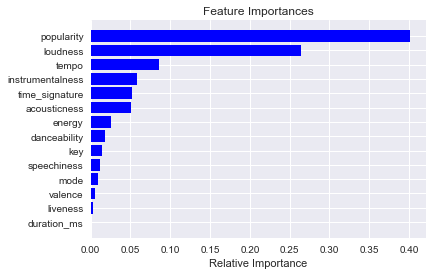

In [13]:
#Let's see how important the different features aer for predicting data, If the categorical data is
# too represented, we should consider removing it

features = different.columns.drop('genre')
importances = best.feature_importances_
indices = np.argsort(importances)

plt.figure()

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

C:\Users\thesm\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


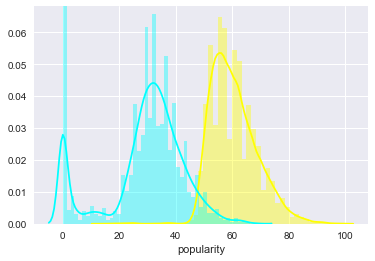

In [14]:
#Out of curioisity, lets graph the distributions of these 2 genres by popularity and loudness

#first get the get all the ORIGINAL values of of Rap and Classic
rap = different.loc[different['genre'] == 0]
classic = different.loc[different['genre'] == 1]    

ax = sns.distplot(rap['popularity'], color = 'yellow')
ax2 = sns.distplot(classic['popularity'], color = 'cyan')
plt.show()

C:\Users\thesm\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


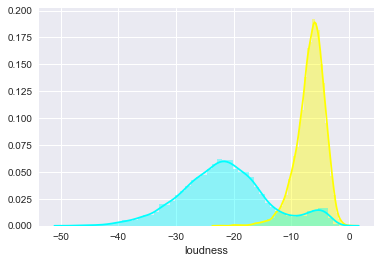

In [15]:
ax = sns.distplot(rap['loudness'], color = 'yellow')
ax2 = sns.distplot(classic['loudness'], color = 'cyan')
plt.show()

## Binary Classifers Comparing Electronic and Jazz


In [16]:
#first we need to only get different values
same = data.loc[(data['genre'] == "Electronic") | (data['genre'] == "Jazz") ]
#then drop the clusters we appended
same.drop('cluster', axis = 1, inplace=True)
#convert Electronic to 0 and Jaxx to 1
numberValues = [0,1]
same.replace(to_replace=['Electronic', 'Jazz'], value=numberValues, inplace=True)
same['genre'] = same['genre'].astype(int)

C:\Users\thesm\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\thesm\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\thesm\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
#convert dataframe into an array
X_and_Y = same.values

#normalize the data values, but not the labels
X_and_Y[:, 1:] = preprocessing.normalize(X_and_Y[:, 1:])


#shuffle the data 3 times and put it into a list
np.random.shuffle(X_and_Y)
X_and_Y_1 = X_and_Y
np.random.shuffle(X_and_Y)
X_and_Y_2 = X_and_Y
np.random.shuffle(X_and_Y)
X_and_Y_3 = X_and_Y

#combine all shuffled sets into an list
List = [X_and_Y_1,X_and_Y_2,X_and_Y_3]

#### DT (electronic & jazz)

In [18]:
# now lets try decision Tree
## Partition Data into a split of 80% training_val 20% test and run 3 trials
## Report the avg train, val, and test accuracies

D_list = [1,2,4,8,16,32]
param = dict( max_depth = D_list)
train_acc_list = []
val_acc_list = []
test_acc_list = []
for trial in range(3):
    
    #get one of the shuffled sets of X_and_Y
    Shuffle = List[trial]
    
    #split data into X and Y
    X = Shuffle[:, 1:]         
    Y = Shuffle[:, 0] 
    
    
    #split data into train/test sets
    X_train_val = X[:int(0.8*len(X))] # Get features from train + val set.
    X_test      = X[int(0.8*len(X)):] # Get features from test set.     
    Y_train_val = Y[:int(0.8*len(Y))] # Get labels from train + val set.
    Y_test      = Y[int(0.8*len(Y)):] # Get labels from test set.
    
    clf = tree.DecisionTreeClassifier(criterion = 'entropy')

    grid = GridSearchCV(clf, param)
    grid.fit(X_train_val,Y_train_val)
    
    train_acc_list.append(grid.cv_results_['mean_train_score'].max())
    val_acc_list.append(grid.cv_results_['mean_test_score'].max())
    
    best = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = grid.best_params_['max_depth'])
    best.fit(X_train_val, Y_train_val)
    test_acc = np.sum(best.predict(X_test) == Y_test)*1.0/X_test.shape[0]
    
    test_acc_list.append(test_acc)
    
train_acc1 = sum(train_acc_list) / 3
val_acc1 = sum(val_acc_list) / 3
test_acc1 = sum(test_acc_list) / 3

print(train_acc1)
print(val_acc1)
print(test_acc1)
print(grid.best_params_['max_depth'])

C:\Users\thesm\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\thesm\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


0.9849430937513839
0.7334484743811168
0.7387530995394971
16


C:\Users\thesm\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


#### RF (electronic & jazz)

In [19]:

## Partition Data into a split of 80% training_val 20% test and run 3 trials
## Report the avg train, val, and test accuracies

N_list = [10, 16, 32, 64, 128, 256]
D_list = [1,2,4,8,16]
param = dict(n_estimators = N_list, max_depth = D_list)


train_acc_list = []
val_acc_list = []
test_acc_list = []
for trial in range(3):
    
    #get one of the shuffled sets of X_and_Y
    Shuffle = List[trial]
    
    #split data into X and Y
    X = Shuffle[:, 1:]         
    Y = Shuffle[:, 0]
    
  
    
    #split data into train/test sets
    X_train_val = X[:int(0.8*len(X))] # Get features from train + val set.
    X_test      = X[int(0.8*len(X)):] # Get features from test set.     
    Y_train_val = Y[:int(0.8*len(Y))] # Get labels from train + val set.
    Y_test      = Y[int(0.8*len(Y)):] # Get labels from test set.
    
    clf = RandomForestClassifier()

    grid = GridSearchCV(clf, param, n_jobs=-1)
    grid.fit(X_train_val,Y_train_val)
    
    train_acc_list.append(grid.cv_results_['mean_train_score'].max())
    val_acc_list.append(grid.cv_results_['mean_test_score'].max())
    
    best = RandomForestClassifier( n_estimators = grid.best_params_['n_estimators'], max_depth = grid.best_params_['max_depth'])
    best.fit(X_train_val, Y_train_val)
    test_acc = np.sum(best.predict(X_test) == Y_test)*1.0/X_test.shape[0]
    
    test_acc_list.append(test_acc)
    
train_acc3 = sum(train_acc_list) / 3
val_acc3 = sum(val_acc_list) / 3
test_acc3 = sum(test_acc_list) / 3

print(train_acc3)
print(val_acc3)
print(test_acc3)
print(grid.best_params_['n_estimators'], grid.best_params_['max_depth'])

C:\Users\thesm\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\thesm\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\thesm\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


0.9282693414817768
0.7887383198264027
0.7777187389302161
128 16


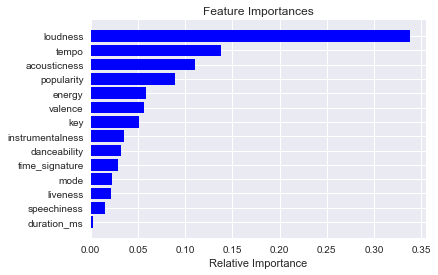

In [20]:
#Let's see how important the different features aer for predicting data, If the categorical data is
# too represented, we should consider removing it

features = same.columns.drop('genre')
importances = best.feature_importances_
indices = np.argsort(importances)

plt.figure()

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

C:\Users\thesm\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


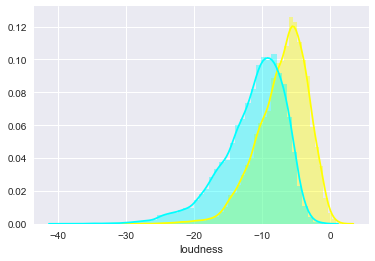

In [21]:
# now lets plot the loudness and tempo distributions

#first get the get all the ORIGINAL values of of Rap and Classic
electronic = same.loc[same['genre'] == 0]
jazz = same.loc[same['genre'] == 1]    

ax = sns.distplot(electronic['loudness'], color = 'yellow')
ax2 = sns.distplot(jazz['loudness'], color = 'cyan')
plt.show()


C:\Users\thesm\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


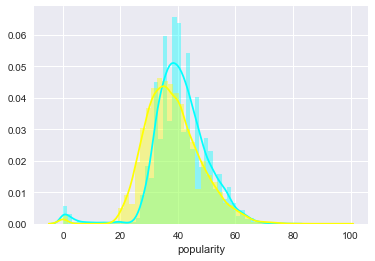

In [22]:

ax2 = sns.distplot(jazz['popularity'], color = 'cyan')
ax = sns.distplot(electronic['popularity'], color = 'yellow')
plt.show()

C:\Users\thesm\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


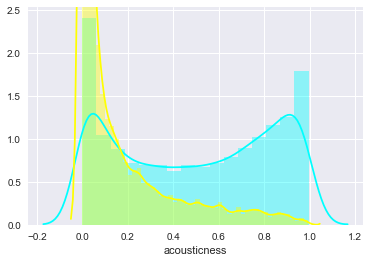

In [23]:
ax2 = sns.distplot(jazz['acousticness'], color = 'cyan')
ax = sns.distplot(electronic['acousticness'], color = 'yellow')
plt.show()

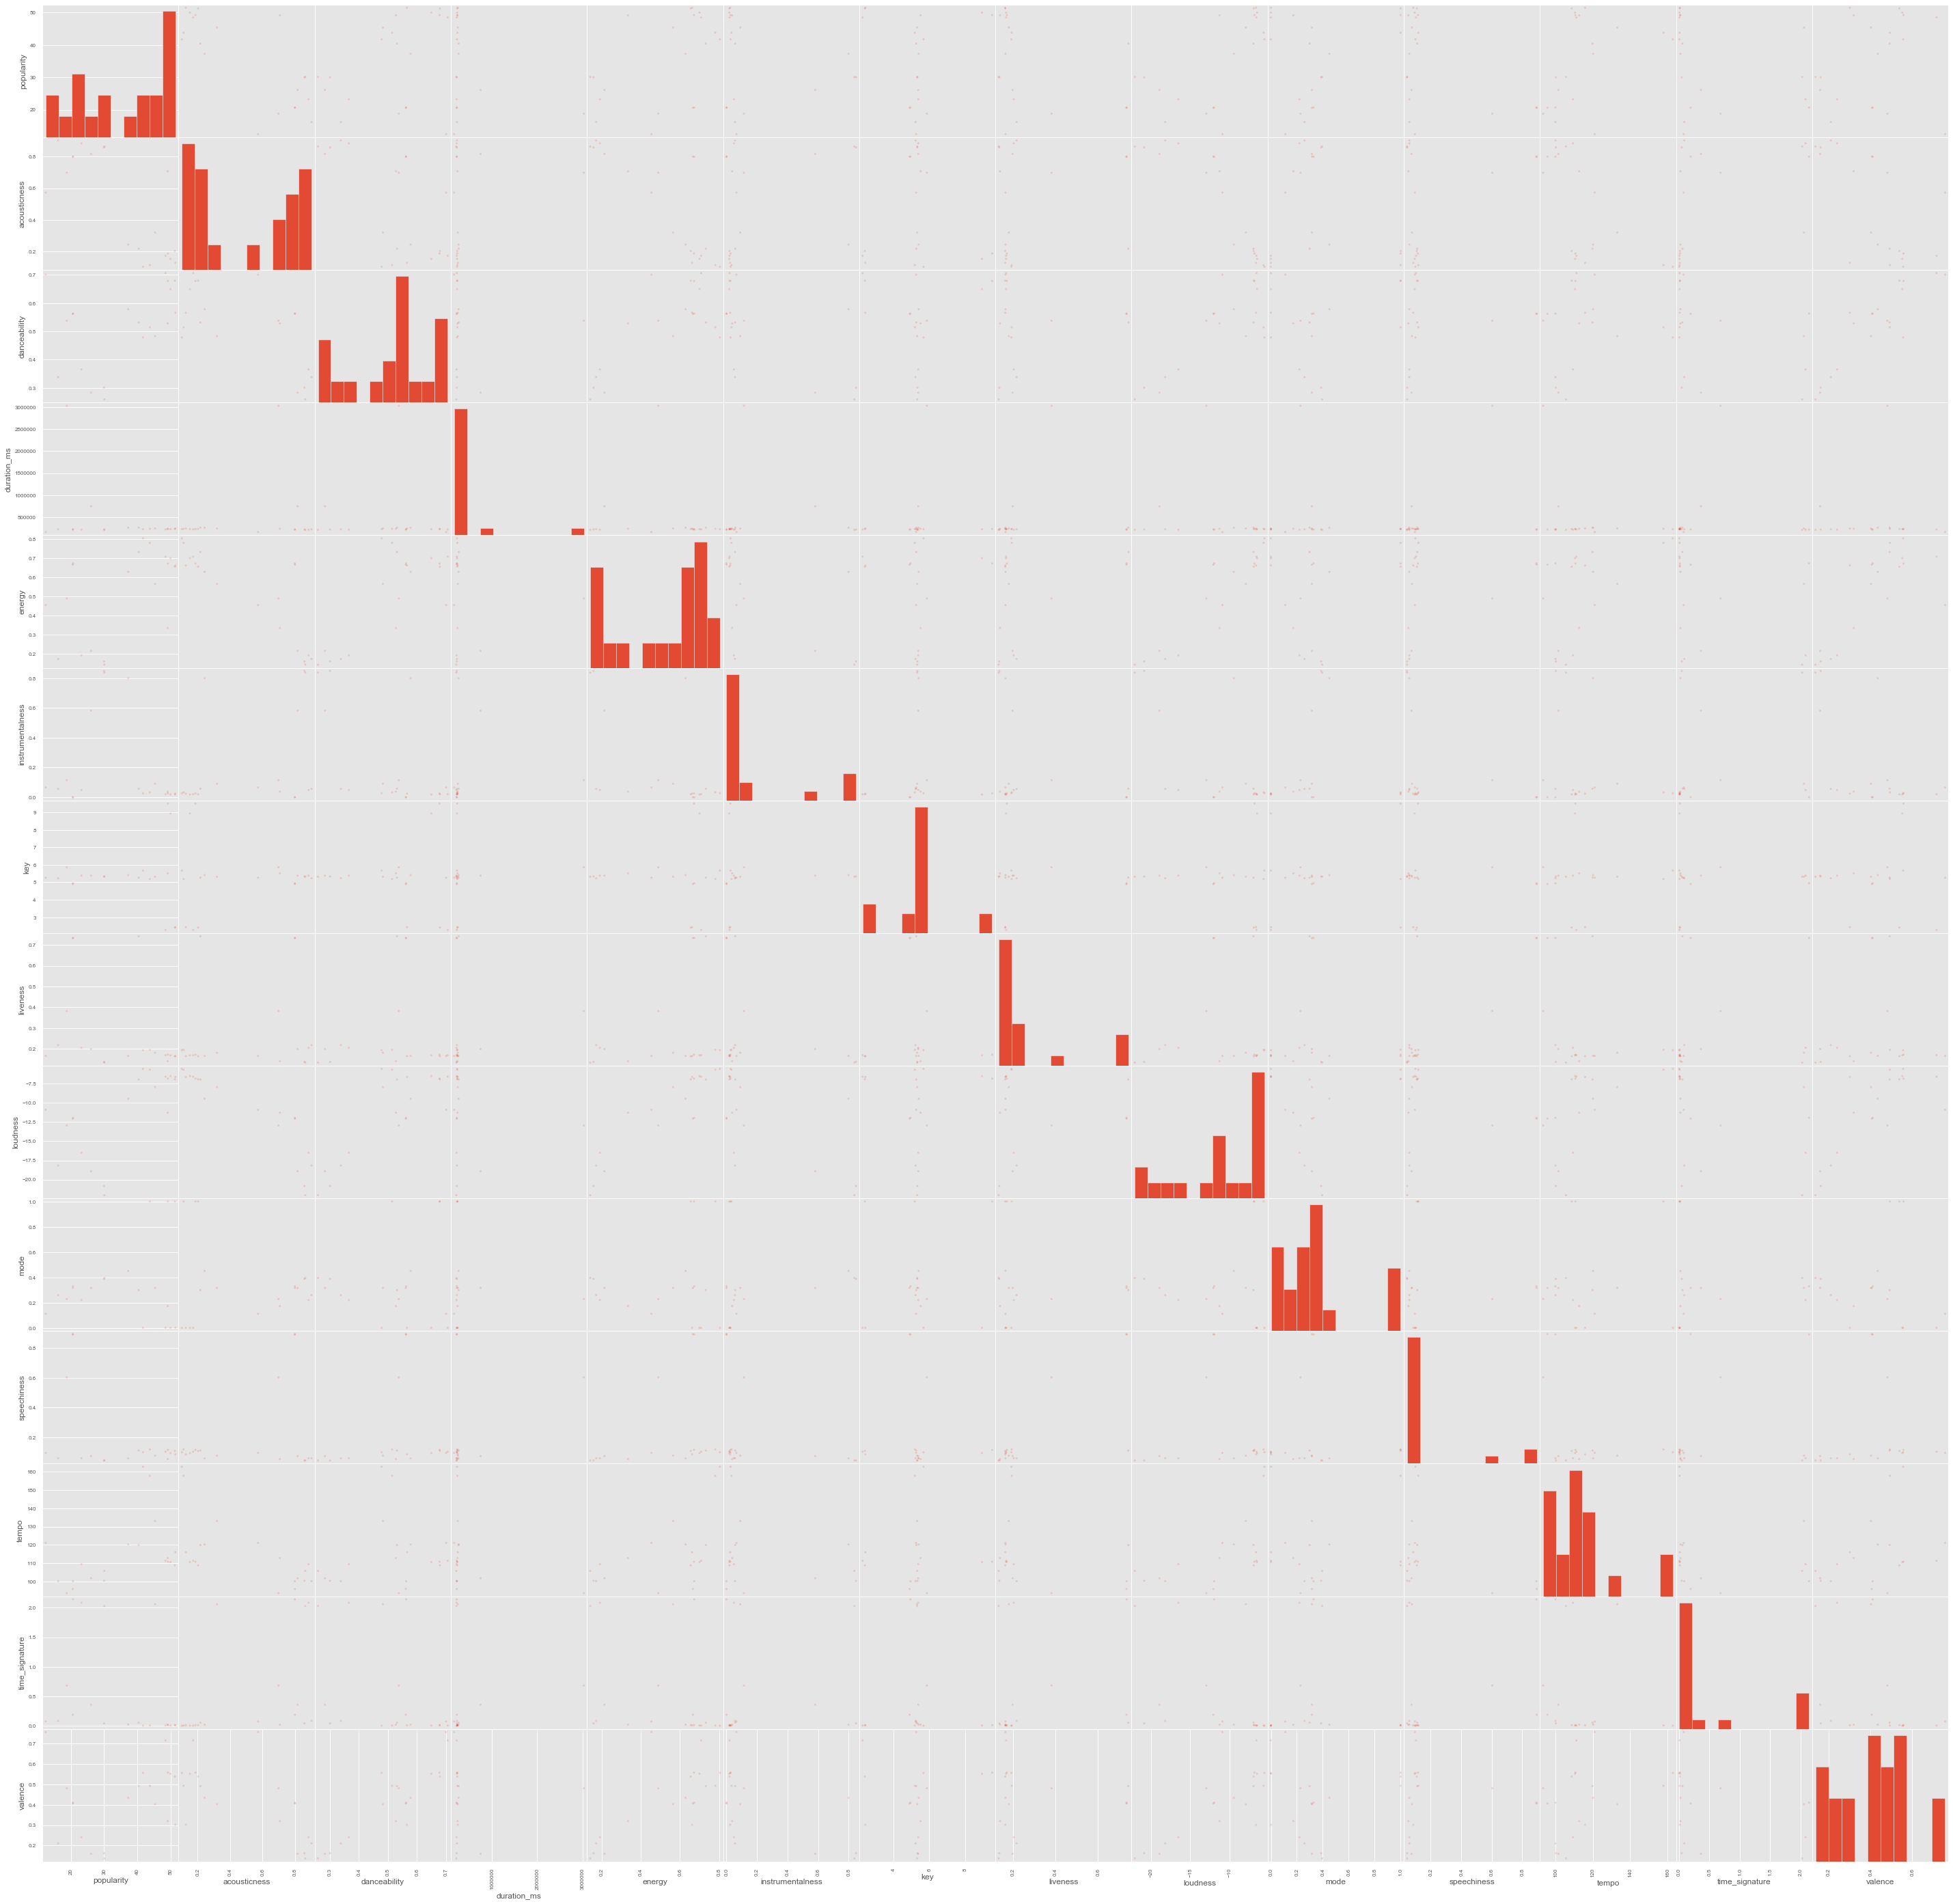

In [17]:
# See how well we did
plt.style.use('ggplot')
plots = pd.plotting.scatter_matrix(clean_mean, alpha=0.2, figsize=(50, 50))

In [ ]:
#check to see how many of each genre are attributed to each cluster

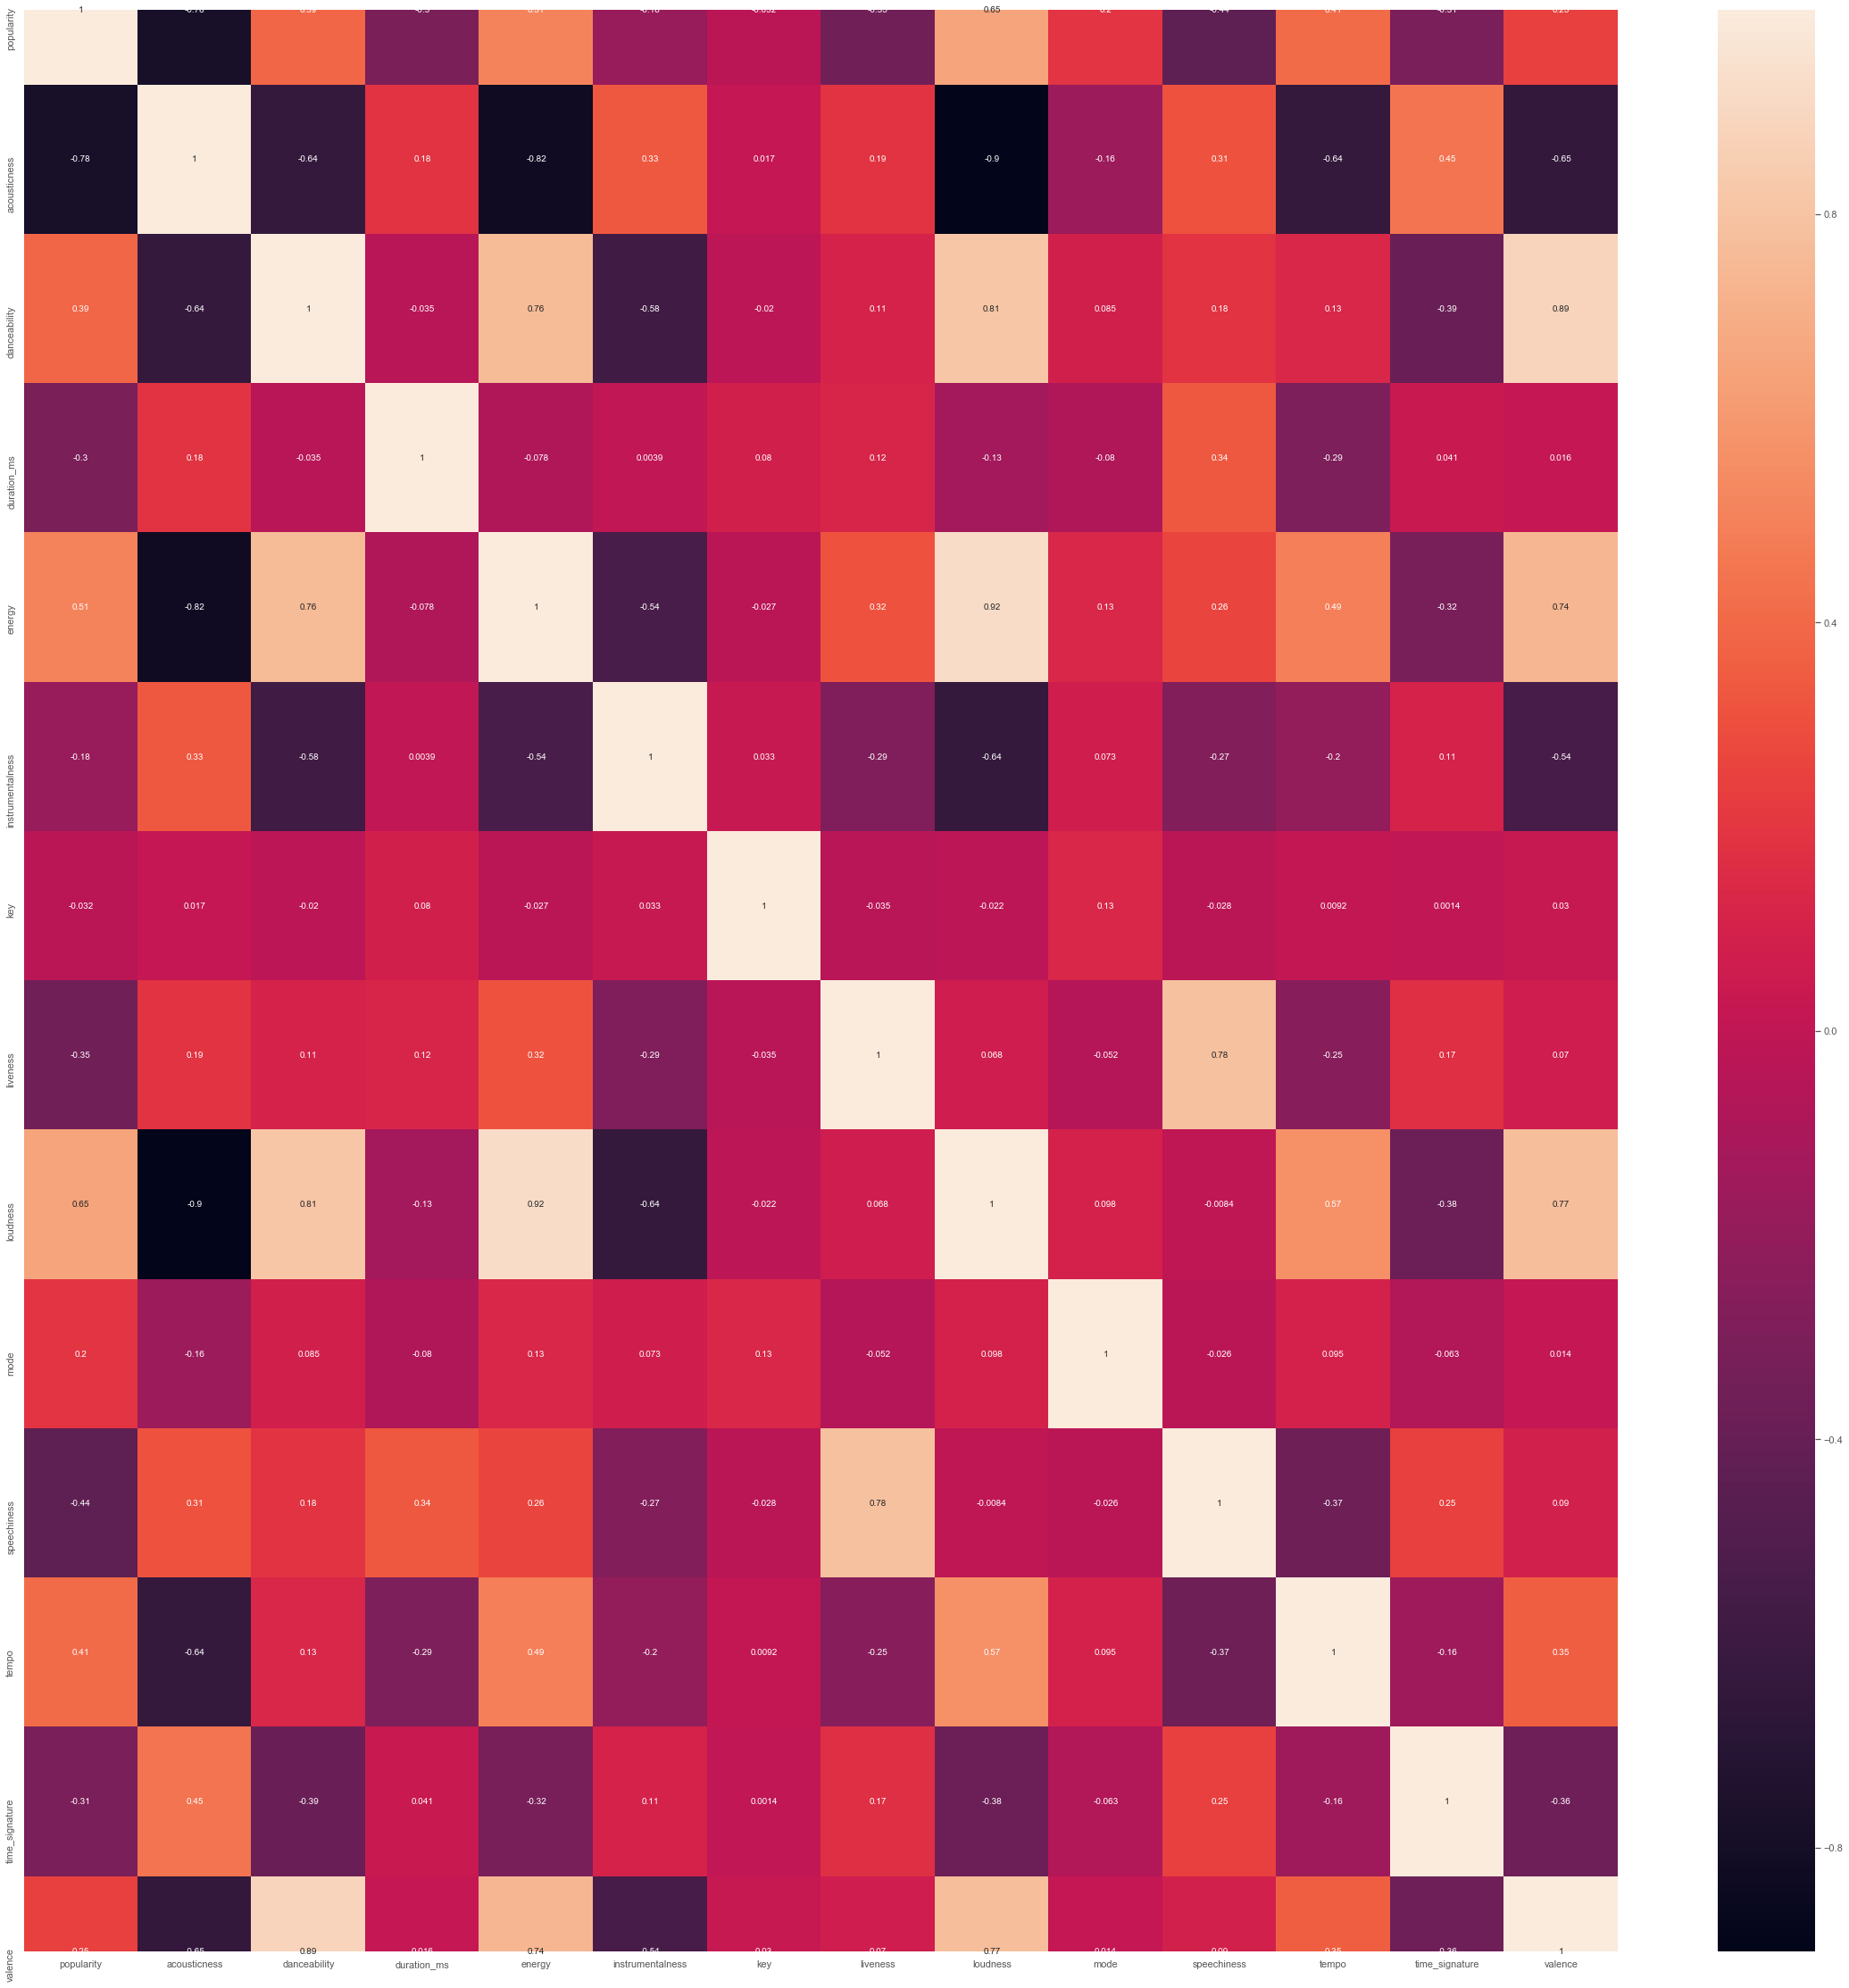

In [18]:
plt.subplots(figsize=(40,40))
sns.heatmap(clean_mean.corr(), annot = True) 

In [21]:
# Normalize the Data for test
test_columns = list(test.columns)
#remove the genre label from the data we will run k-means on
test_columns.remove('genre')
normalized_test_data = stats.zscore(test[test_columns])

In [22]:
# Run the K-Means Algorithm on the normalized test Data

kmeans.predict(normalized_test_data)

array([ 9, 14,  0, ...,  0,  7,  2])

In [ ]:
# Writeup



#ideas for showing the relationships between clusters
#.5) We can determine the optimal number of k using an elbow plot which displays and finding the elbow in the sum: (x - u)^2 for the clusters
#1) show the counts of each genre for each cluster
#2) show which genres tended to be clustered together (i.e predict which genres will be the hardest to tell apart)
#3) We can then see the counts of each genre in each cluster to see make some predictions about which genres wwill be similiar
#   and therefore easier to predict
#4) We can then simplifiy the problem down to a binary problem, ie "does this song belong to rap or rock"
#5) We can then use RF to determine which 2 features are the most important for classifying data
#    -we can then graph the data much easier, as there are only 2 features.
#6) We can then try to classify the data with other classfiers such as KNN, SVM to see which classifier is best at
#   classifying data
#7) We can see whether there is a difference in the classifiers ability to classify data based on whther the genre's are similiar